In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

MINST

In [2]:
from keras .datasets import mnist

Using TensorFlow backend.


In [3]:
(x0_train,y0_train),(x0_test, y0_test) = mnist.load_data()

In [4]:
len(x0_train)

60000

In [5]:
len(x0_test)

10000

In [7]:
##x0_train[59991]

In [8]:
y0_train[59991]

2

In [15]:
#plt.imshow(x0_train[59991], cmap="Greys")

In [14]:
#plt.imshow(x0_train[5], cmap="prism")

In [11]:
y0_train[5555]

7

In [13]:
#plt.imshow(x0_train[5555], cmap="Wistia")

In [16]:
x_train = x0_train.reshape(60000,28*28)

In [17]:
x_test = x0_test.reshape(10000,28*28)

In [18]:
from keras.utils import np_utils

In [19]:
y_train = np_utils.to_categorical(y0_train,10)

In [20]:
y_test = np_utils.to_categorical(y0_test,10)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [22]:
model = Sequential()

In [23]:
model.add(Dense(units=1000, input_dim=784))
model.add(Activation('sigmoid'))#激活函數

In [24]:
model.add(Dense(units=500))
model.add(Activation('sigmoid'))

In [25]:
model.add(Dense(units=10))
model.add(Activation('softmax'))#打散

compile

In [26]:
model.compile(loss='mse', optimizer=SGD(lr=0.1),metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 19s - loss: 0.0774 - acc: 0.4341    
Epoch 2/20
60000/60000 [==============================] - 23s - loss: 0.0486 - acc: 0.7558    
Epoch 3/20
60000/60000 [==============================] - 23s - loss: 0.0311 - acc: 0.8543    
Epoch 4/20
60000/60000 [==============================] - 24s - loss: 0.0232 - acc: 0.8815    
Epoch 5/20
60000/60000 [==============================] - 24s - loss: 0.0193 - acc: 0.8957    
Epoch 6/20
60000/60000 [==============================] - 23s - loss: 0.0169 - acc: 0.9055    
Epoch 7/20
60000/60000 [==============================] - 23s - loss: 0.0152 - acc: 0.9140    
Epoch 8/20
60000/60000 [==============================] - 23s - loss: 0.0140 - acc: 0.9196    
Epoch 9/20
60000/60000 [==============================] - 23s - loss: 0.0131 - acc: 0.9250    
Epoch 10/20
60000/60000 [==============================] - 23s - loss: 0.0123 - acc: 0.9291    
Epoch 11/20
60000/60000 [========================

In [24]:
from ipywidgets import interact_manual

In [25]:
result = model.predict_classes(x_test)

10000/10000 [==============================] - 1s     


In [26]:
def 辨識(測試編號):
    plt.imshow(x0_test[測試編號], cmap="Greys")
    print("神經網路判斷為:", result[測試編號])

神經網路判斷為: 3


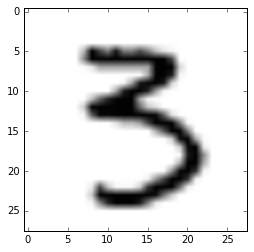

In [27]:
interact_manual(辨識, 測試編號 = (0, 9999));

In [28]:
model_json = model.to_json()
open('handwriting_model_architecture.json', 'w').write(model_json)
model.save_weights('handwriting_model_weights.h6')

In [30]:
score = model.evaluate(x_test,y_test)
print("Total loss on testing set : ",score[0])
print("Accurancy of testing set : ",score[1])
#units=1000 500 10 batch_size=100, epochs=20層

 9952/10000 [============================>.] - ETA: 0sTotal loss on testing set :  0.00972458789775
Accurancy of testing set :  0.9387
